In [1]:
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from ml_tooling import Model
from ml_tooling.data import Dataset
from ml_tooling.transformers import DFStandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV
import pandas as pd
import numpy as np

In [5]:
class BostonData(Dataset):
    def load_training_data(self):
        boston = load_boston()
        features = pd.DataFrame(data=boston.data, columns=boston.feature_names)
        return features, np.log(boston.target)

    
    def load_prediction_data(self, idx):
        boston = load_boston()
        features = pd.DataFrame(data=boston.data, columns=boston.feature_names)
        return features.loc[idx]
    
data = BostonData()
data.create_train_test()

<BostonData - Dataset>

In [7]:
linear = Model(LinearRegression())
result = linear.score_estimator(data)
result

[16:46:11] - Scoring estimator...
[16:46:11] - LinearRegression - r2: 0.7468248298131417


<Result LinearRegression: r2: 0.75>

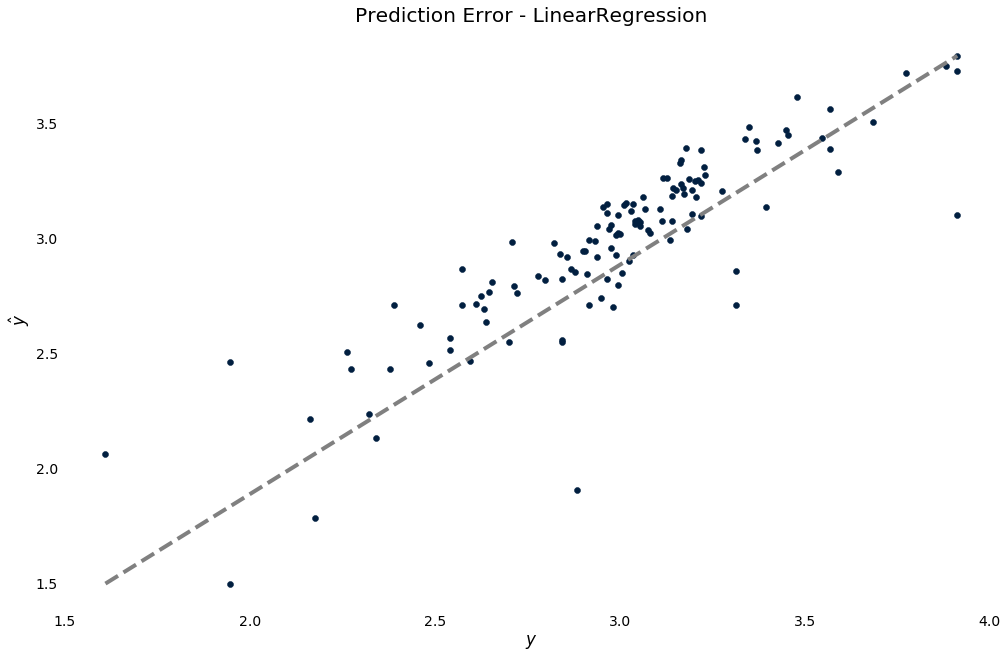

In [8]:
result.plot.prediction_error()

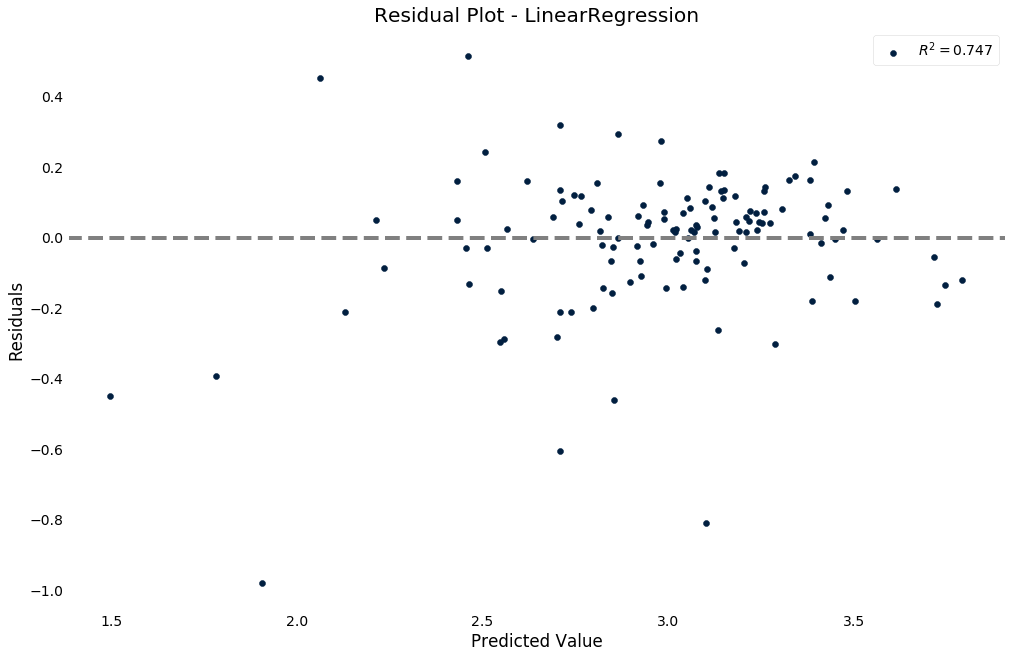

In [9]:
result.plot.residuals()

# Scaling

In [10]:
scaled = Pipeline([
    ('scale', DFStandardScaler()),
    ('model', LinearRegression())
])

In [12]:
scaled_linear = Model(scaled)
result = scaled_linear.score_estimator(data)
result

[16:46:35] - Scoring estimator...
[16:46:35] - LinearRegression - r2: 0.7468248298131496


<Result LinearRegression: r2: 0.75>

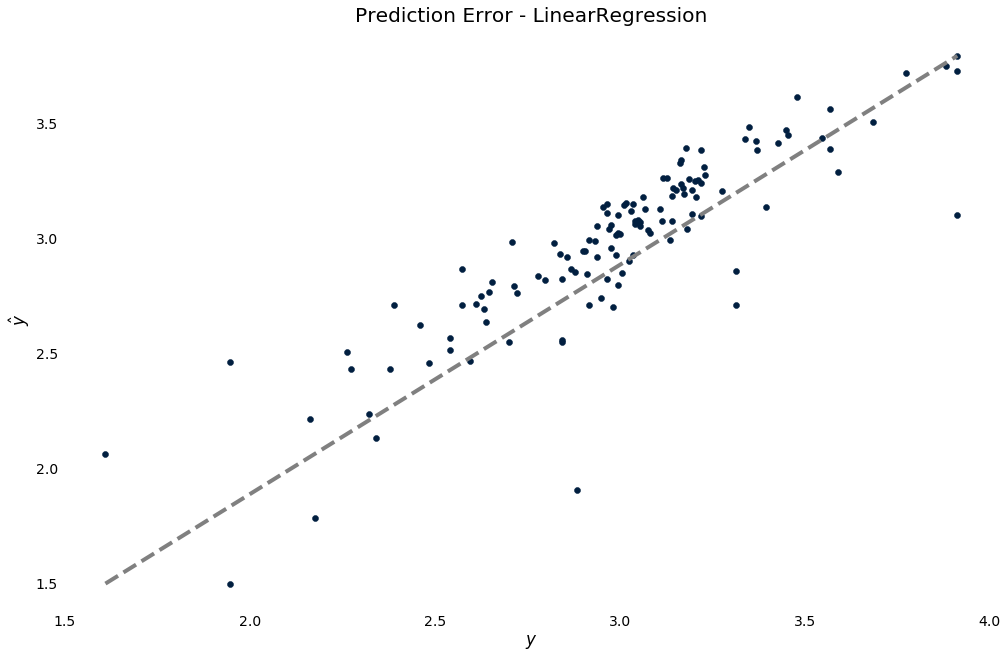

In [13]:
result.plot.prediction_error()

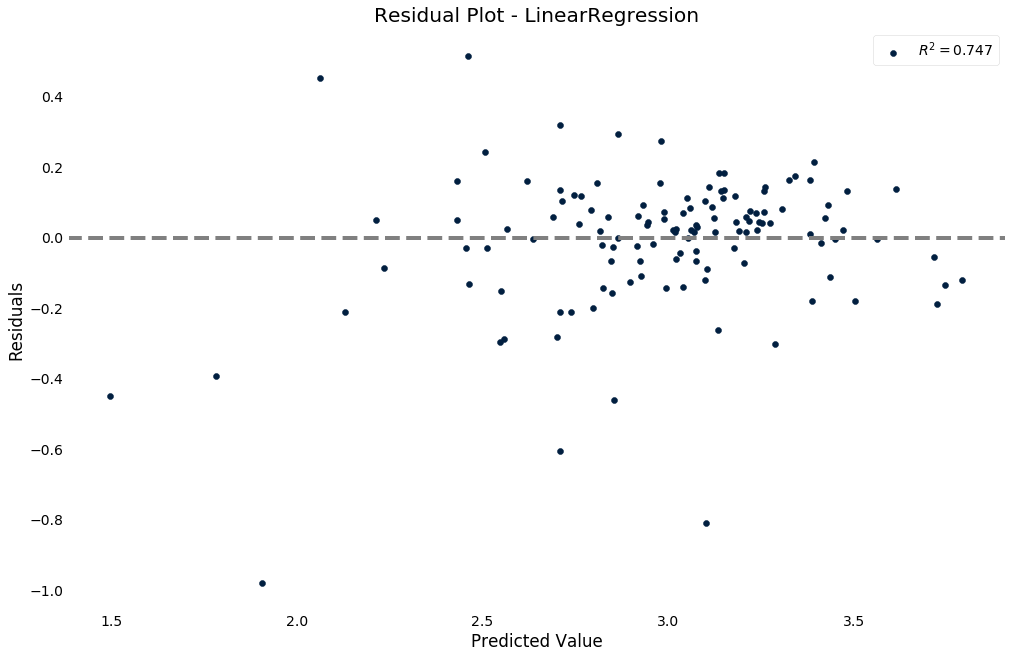

In [14]:
result.plot.residuals()

In [15]:
from ml_tooling.transformers import Select

In [16]:
def create_pipeline(estimator):
    return Pipeline([
        ('select', Select(['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX', 'NOX',  'CRIM'])),
        ('scaler', DFStandardScaler()),
        ('estimator', estimator)
    ])

In [19]:
best_model, results = Model.test_estimators(data, [create_pipeline(est) for est in [LinearRegression(), RidgeCV(cv=100), ElasticNetCV(cv=100)]])

[16:47:07] - Training estimator 1/3: <property object at 0x7f9b419bdb90>
[16:47:07] - Scoring estimator...
[16:47:07] - LinearRegression - r2: 0.7093067216330452
[16:47:07] - Training estimator 2/3: <property object at 0x7f9b419bdb90>
[16:47:07] - Scoring estimator...
/home/anders/.pyenv/versions/3.7.4/envs/ml_tooling_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[16:47:07] - RidgeCV - r2: 0.7118345374509629
[16:47:07] - Training estimator 3/3: <property object at 0x7f9b419bdb90>
[16:47:07] - Scoring estimator...
[16:47:08] - ElasticNetCV - r2: 0.7096429925321545
[16:47:08] - Best estimator: RidgeCV - r2: 0.7118345374509629


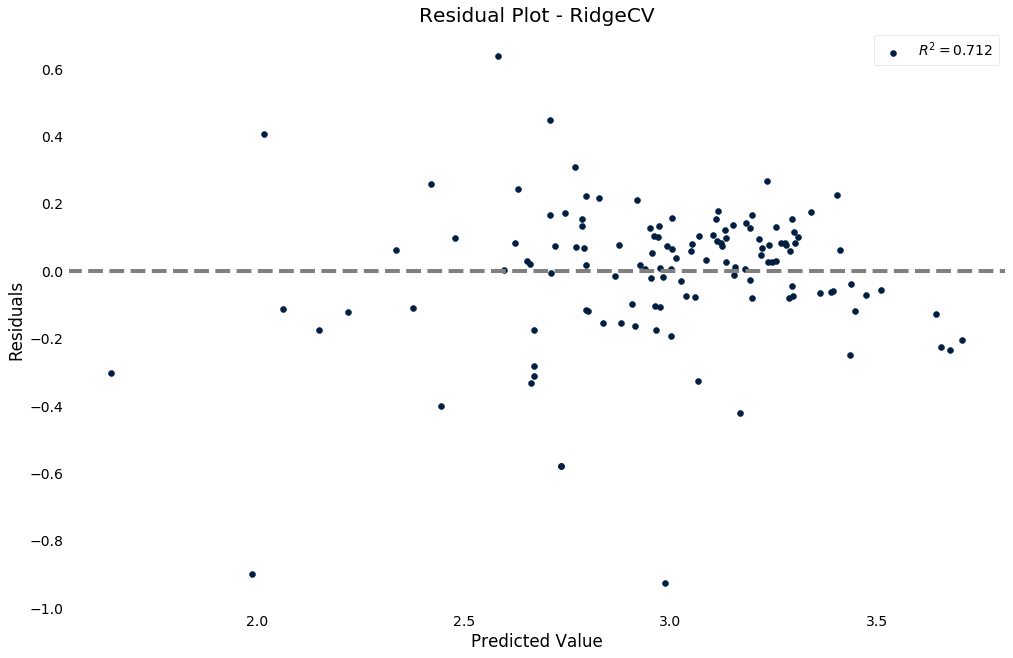

In [20]:
results.plot.residuals()

In [22]:
best_model.estimator.named_steps['estimator'].coef_

array([-0.20540134,  0.09404735, -0.06838742,  0.0278824 , -0.02643275,
       -0.02007056, -0.07268972])

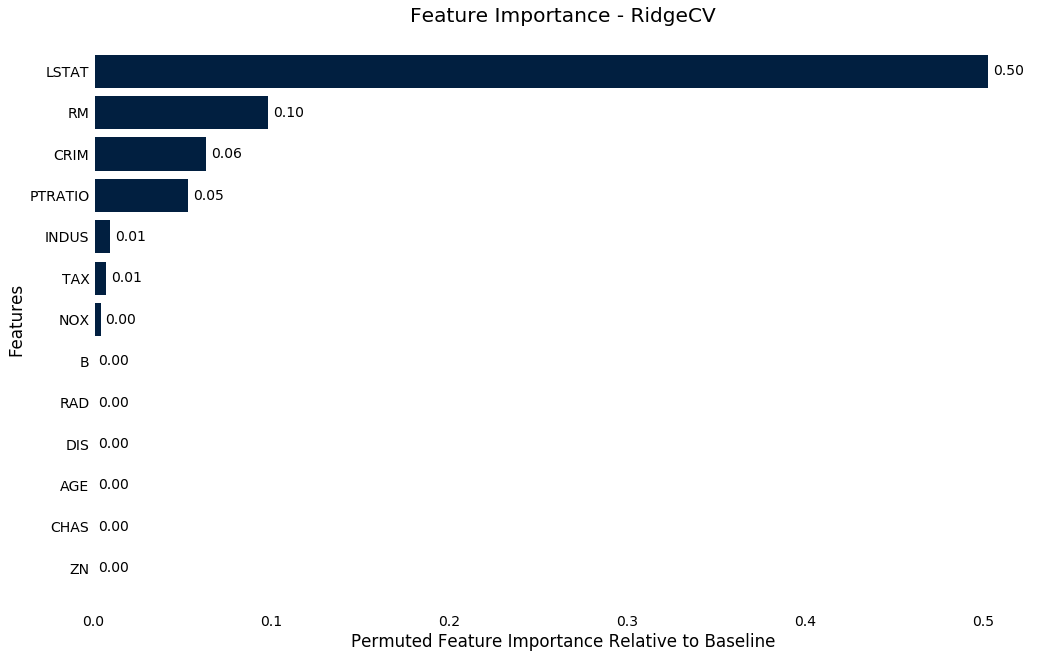

In [23]:
results.plot.feature_importance(1000)